In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**Importing the dataset**

In [ ]:
data = pd.read_csv('Social_Network_Ads.csv')


In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data['Age'].value_counts()

35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64

In [ ]:
data['Purchased'].unique()

array([0, 1])

In [ ]:
data['Age'].isnull().sum()

0

**Splitting the dataset into the Training set and Test set**

In [ ]:
#here user_id not play role for predicting class , so drop that column

In [ ]:
data = data.drop(['User ID'] , axis = 1)


In [ ]:
data 


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
X = data.iloc[:, 0:-1]

In [ ]:
y = data['Purchased']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 10)

**Feature Scaling**

Text(0, 0.5, 'Estimated_Salary')

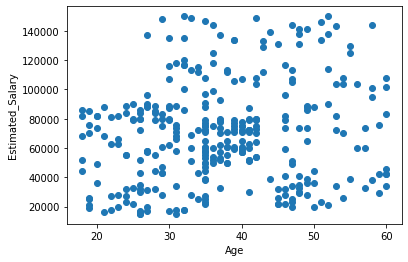

In [ ]:
plt.scatter(X_train['Age'] ,X_train['EstimatedSalary'] )
plt.xlabel('Age')
plt.ylabel('Estimated_Salary')

In [ ]:
#from above scatter plot data are more scattered so there is no correlation between age and Estimated salary

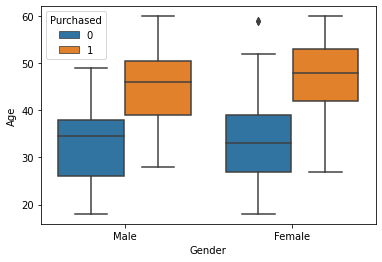

In [ ]:
sns.boxplot(x = 'Gender' , y = 'Age' , hue = 'Purchased' ,data = data)

In [ ]:
#from  above box plot of age and gender with respect to Purchased , Purchase is more for age more than 40

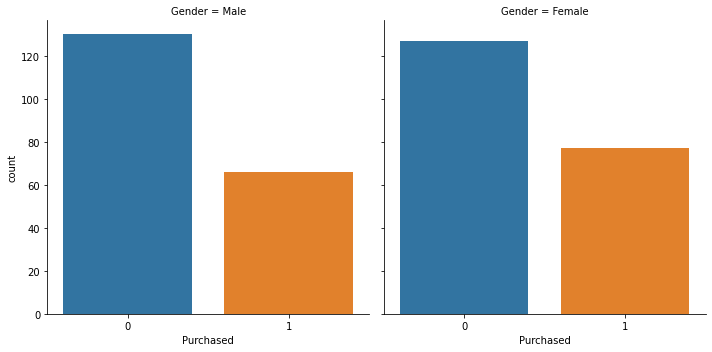

In [ ]:
sns.catplot(x="Purchased",col='Gender', data= data , kind = 'count')

In [ ]:
#here from above graph number of male and female who purchase the product is almost same 

In [ ]:
#now scalling gender with label encoding and,  Estimated Salary and Age by standardScaler 
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()

In [ ]:
X_train['Gender'] = LE.fit_transform(X_train[['Gender']])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_test['Gender'] = LE.fit_transform(X_test[['Gender']])

In [ ]:
SS = StandardScaler()

In [ ]:
X_train.iloc[:, 1:] = SS.fit_transform(X_train.iloc[:,1:])

In [ ]:
X_train

,Gender,Age,EstimatedSalary
303,1,-0.034498,0.268454
349,1,0.060670,-0.259292
149,1,-1.652355,0.121858
100,1,-0.986179,0.532328
175,0,-1.366851,-1.226827
...,...,...,...
369,0,1.583358,-1.285466
320,0,1.393022,1.998290
15,1,-0.795843,0.297774
125,0,0.155838,-0.259292


In [ ]:
X_test.iloc[:,1:] = SS.fit_transform(X_test.iloc[:,1:])

**Fitting Decision Tree Classification to the Training set**

In [ ]:
dc = DecisionTreeClassifier() 

In [ ]:
dc.fit(X_train , y_train)

DecisionTreeClassifier()

**Predicting the Test set results**

In [ ]:
y_pred = dc.predict(X_test)

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score

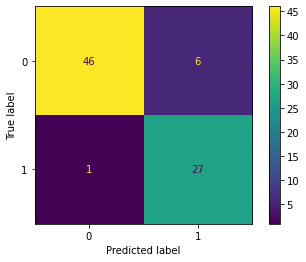

In [ ]:
ConfusionMatrixDisplay.from_estimator(dc , X_test , y_test)

In [ ]:
accuracy_score(y_test ,y_pred)

0.9125